In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
import svgpathtools

In [4]:
path = svgpathtools.parse_path(open("track.path").read())
trackimg = plt.imread("trackbirdseye.png")

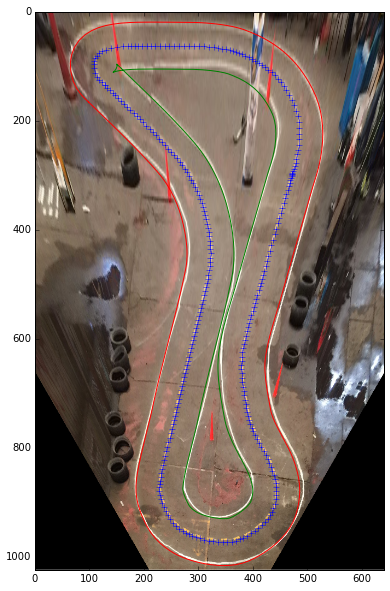

In [5]:
plt.rcParams["figure.figsize"] = (10, 10)
plt.imshow(trackimg)
plt.xlim(0, trackimg.shape[1])
plt.ylim(trackimg.shape[0], 0)
x = 2.05*np.array(map(path.point, np.linspace(0, 1, 300))) - 200
dx = 1j*np.array(map(path.derivative, np.linspace(0, 1, 300)))
dx /= np.abs(dx)
plt.plot(np.real(x), np.imag(x), '+')
lw = 21*2.05
plt.plot(np.real(x + lw*dx), np.imag(x + lw*dx))
plt.plot(np.real(x - lw*dx), np.imag(x - lw*dx))

In [6]:
''' we ideally want to get some equally spaced points here; the bezier curves aren't necessarily equally spaced.
'''

#np.abs(x[1:] - x[:-1])
print path.point(0), path.derivative(0)
print (path.point(0.0001) - path.point(0)) / (0.0001 * path.length())

(160.358+65.76j) (-0.746886310376-0.731646666699j)
(-0.746135630005-0.72970196878j)


In [7]:
def next_t(path, t, dist):
    p = path.point(t)
    L = path.length()
    t0 = t
    # t += 1.0 / np.abs(path.derivative(t))
    itr = 0
    while itr < 20:
        itr += 1
        p1 = path.point(t)
        err = np.abs(p1 - p) - dist
        d1 = path.derivative(t)
        if np.abs(err) < 1e-5:
            return t, p1, d1 / np.abs(d1)
        derr = np.abs(d1) * L
        # do a step in Newton's method
        # (clipped because some of the gradients in the curve are really small)
        t -= np.clip(err / derr, -1e-2, 1e-2)
        t = np.clip(t, 0, 1)
    return t, p, d1 / np.abs(d1)

d0 = path.derivative(0)
pts = [[path.point(0), d0 / np.abs(d0)]]
t = 0
while t < 1:
    t, p, d = next_t(path, t, 11)
    pts.append([p, d])
#    p = path.point(t)
#    adp = np.abs(dp)
#    pts.append([p - 100, dp / adp, adp])
#    t += dt
pts = np.array(pts)


(1024, 640, 3)


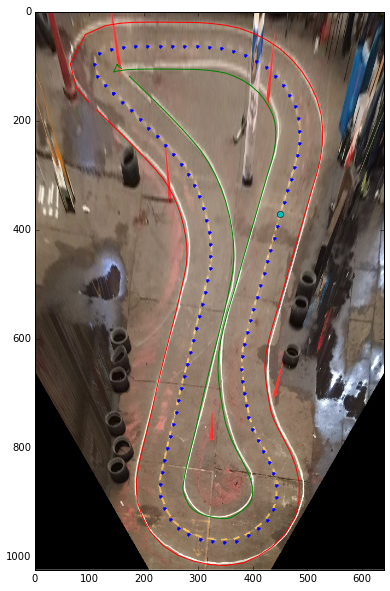

In [29]:
plt.xlim(0, trackimg.shape[1])
plt.ylim(trackimg.shape[0], 0)

print trackimg.shape

x = 2.05*pts[:, 0] - 200
dx = 2.05j*pts[:, 1]

plt.imshow(trackimg)
plt.plot(np.real(x), np.imag(x), '.')
plt.plot(np.real(x + 21*dx), np.imag(x + 21*dx))
plt.plot(np.real(x - 21*dx), np.imag(x - 21*dx))
plt.plot(np.real(x[30]), np.imag(x[30]), 'o')

In [23]:
cpts = np.copy(pts)
xmin, xmax = np.min(np.real(cpts[:, 0])) - 40, np.max(np.real(cpts[:, 0])) + 40
ymin, ymax = np.min(np.imag(cpts[:, 0])) - 40, np.max(np.imag(cpts[:, 0])) + 40
print xmin, xmax, xmax-xmin
print ymin, ymax, ymax-ymin
scale = 256.0 / (xmax-xmin)
cpts[:, 0] = (cpts[:, 0] - xmin - 1j*ymin)*scale
print scale
xmin, xmax = np.min(np.real(cpts[:, 0])) - 40*scale, np.max(np.real(cpts[:, 0])) + 40*scale
ymin, ymax = np.min(np.imag(cpts[:, 0])) - 40*scale, np.max(np.imag(cpts[:, 0])) + 40*scale
print xmin, xmax, xmax-xmin
print ymin, ymax, ymax-ymin


110.343466633 374.285105451 263.941638818
-9.74370458987 514.752141014 524.495845604
0.969911383238
0.0 256.0 256.0
0.0 508.714491112 508.714491112


In [22]:
trackdata = np.vstack([np.real(cpts[:, 0]), np.imag(cpts[:, 0]), np.real(cpts[:, 1]), np.imag(cpts[:, 1])]).T
open("trackdata.f32", "wb").write(np.getbuffer(trackdata.astype(np.float32)))

In [278]:
cpts.shape

(105, 2)

In [24]:
20 / scale

20.620440532654428

In [25]:
2.75 / scale

2.8353105732399837